<a href="https://colab.research.google.com/github/Imran012x/Hilsha_CoLab/blob/main/Concise_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import zipfile
import os

with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/sardin.zip', 'r') as zip_ref:
#     zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/chandana.zip', 'r') as zip_ref:
#     zip_ref.extractall('')

**Importing the Dependencies**

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
Ilish_pic= os.listdir('ilish')
print(Ilish_pic[0:5])
print(Ilish_pic[-5:])

print()
Sardin_pic= os.listdir('sardin')
Chandana_pic= os.listdir('chandana')
print('Ilish images:', len(Ilish_pic))
print('Sardin images:', len(Sardin_pic))
print('Chandana images:', len(Chandana_pic))

['82.webp', '253.webp', '6.webp', '25.webp', '364.webp']
['89.webp', '116.webp', '211.webp', '86.webp', '55.webp']

Ilish images: 500
Sardin images: 500
Chandana images: 500


**Creating Labels for the two class of Images**

Ilish  -->   0

Sardin  -->  1

Chandana --> 2

In [5]:
# create the labels

Ilish_labels = [0]*500

Sardin_labels = [1]*500

Chandana_labels = [2]*500

print(Ilish_labels[0:5])

print(Sardin_labels[0:5])

print(Chandana_labels[0:5])

print(len(Ilish_labels))
print(len(Sardin_labels))
print(len(Chandana_labels))

labels = Ilish_labels + Sardin_labels + Chandana_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
500
500
500
1500
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]


**Displaying the Images**

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [6]:
import numpy as np
import random
from PIL import Image

# Parameters
image_number = 500  # Number of images to select from each type

# Initialize the list to store the images
data = []

# Process ilish images
ilish_path = 'ilish/'
Ilish_pic = sorted(os.listdir(ilish_path))  # Make sure the images are in order
random.shuffle(Ilish_pic)  # Shuffle images to get random ones
for img_file in Ilish_pic[:image_number]:
    image = Image.open(ilish_path + img_file)
    image = image.resize((224, 224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process sardin images
sardin_path = 'sardin/'
Sardin_pic = sorted(os.listdir(sardin_path))  # Make sure the images are in order
random.shuffle(Sardin_pic)  # Shuffle images to get random ones
for img_file in Sardin_pic[:image_number]:
    image = Image.open(sardin_path + img_file)
    image = image.resize((224, 224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process chandana images
chandana_path = 'chandana/'
Chandana_pic = sorted(os.listdir(chandana_path))  # Make sure the images are in order
random.shuffle(Chandana_pic)  # Shuffle images to get random ones
for img_file in Chandana_pic[:image_number]:
    image = Image.open(chandana_path + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Now, `data` contains 4000 random images from each type, for a total of 12,000 images.

In [7]:
# Convert labels to numpy array for easy processing
labels = np.array(labels)

# Count the number of images in each class
unique, counts = np.unique(labels, return_counts=True)

# Print the number of images for each class
class_counts = dict(zip(unique, counts))
print(f"Class counts: {class_counts}")

Class counts: {0: 500, 1: 500, 2: 500}


In [8]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

**Train Test Split**

(1500, 224, 224, 3) (1200, 224, 224, 3) (300, 224, 224, 3)


array([[[  4,   4,   4],
        [  7,   7,   7],
        [ 44,  43,  41],
        ...,
        [130, 131, 130],
        [126, 126, 126],
        [118, 118, 118]],

       [[  3,   3,   3],
        [  5,   6,   6],
        [ 44,  44,  42],
        ...,
        [122, 124, 123],
        [121, 123, 120],
        [123, 123, 123]],

       [[  3,   3,   3],
        [  3,   3,   3],
        [ 34,  34,  32],
        ...,
        [122, 120, 123],
        [123, 129, 129],
        [125, 125, 123]],

       ...,

       [[  5,   3,   4],
        [  5,   3,   4],
        [  5,   4,   2],
        ...,
        [ 16,  12,   9],
        [ 16,  12,   9],
        [ 17,  13,  10]],

       [[  5,   4,   2],
        [  6,   5,   3],
        [  5,   4,   2],
        ...,
        [ 17,  14,   9],
        [ 17,  13,  10],
        [ 15,  13,   9]],

       [[  6,   5,   3],
        [  5,   5,   2],
        [  5,   4,   2],
        ...,
        [ 17,  15,   9],
        [ 16,  14,   9],
        [ 18,  14,  11]]], dtype=uint8)
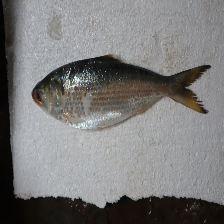

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

X_train[0]

In [10]:
# stop

#CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score
import seaborn as sns

# Build a CNN model
input_shape = X_train_scaled.shape[1:]  # Dynamically set input shape

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')  # Adjust for the number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation data
history = model.fit(X_train_scaled, Y_train, epochs=20, batch_size=32,
                    validation_split=0.1,  # 10% of data used for validation
                    verbose=1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_scaled, Y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)

# Predictions
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Accuracy
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 494ms/step - accuracy: 0.4559 - loss: 2.4538 - val_accuracy: 0.7083 - val_loss: 0.6591
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.8077 - loss: 0.4815 - val_accuracy: 0.7417 - val_loss: 0.4412
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8798 - loss: 0.2788 - val_accuracy: 0.7917 - val_loss: 0.4723
Epoch 4/20
26/34 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9589 - loss: 0.1139

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Y_test to one-hot encoding for ROC curve (if it's not one-hot encoded already)
Y_test_one_hot = to_categorical(Y_test, num_classes=3)

# ROC Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Normalize the confusion matrix for intensity representation
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Custom colormap for better visualization: Blue for correct, grey for incorrect
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["lightgrey", "white", "blue"], N=256)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_normalized, annot=False, fmt='.2f', cmap=custom_cmap, cbar=True,
                 cbar_kws={"label": "Intensity (Correct: Blue, Incorrect: Light Grey)"},
                 linewidths=1, linecolor='black', square=True)

# Add numbers dynamically with correct coloring
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        value = conf_matrix[i, j]
        normalized_value = conf_matrix_normalized[i, j]

        # Ensure "0" is shown for empty cells
        display_value = f'{value}' if value > 0 else '0'

        # Font color based on correctness
        font_color = "green" if i == j else "red"

        ax.text(j + 0.5, i + 0.5, display_value, ha='center', va='center',
                color=font_color, fontsize=12, fontweight="bold")

plt.title('Confusion Matrix with Color-Coded Numbers')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()





# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()
plt.show()


# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot([test_accuracy] * len(history.history['accuracy']), '--', label='Test Accuracy', color='red')
plt.title('Training vs Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot([test_loss] * len(history.history['loss']), '--', label='Test Loss', color='orange')
plt.title('Training vs Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




In [ ]:
# F1 Score
f1 = f1_score(Y_test, Y_test_pred, average='weighted')
print(f"F1 Score (Weighted): {f1:.4f}")

In [ ]:
# R2 Score
# R2 is calculated based on probabilities
r2 = r2_score(Y_test, Y_test_pred_prob.argmax(axis=1))
print(f"R2 Score: {r2:.4f}")


In [ ]:
# Save the model
model.save("cnn_model.h5")
print("Model saved as cnn_model.h5")

In [ ]:
model.save("cnn.h5")

#CNN with K-FOLD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the Stratified K-Folds Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store training and validation results for each fold
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []
val_accuracies_all_folds = []
val_losses_all_folds = []

# Perform Stratified K-Fold Cross Validation
for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train_scaled, Y_train)):
    print(f"\nTraining fold {fold + 1}...")

    # Create the training and validation datasets for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Build the CNN model for each fold
    input_shape = X_train_fold.shape[1:]
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(3, activation='softmax')  # Adjust for the number of classes
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model with validation data
    history = model.fit(X_train_fold, Y_train_fold, epochs=20, batch_size=32, validation_data=(X_val_fold, Y_val_fold), verbose=1)

    # Evaluate the model on both the training and validation data
    train_loss, train_accuracy = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    # Append the results for later comparison
    train_accuracies.append(train_accuracy)
    test_accuracies.append(val_accuracy)
    train_losses.append(train_loss)
    test_losses.append(val_loss)

    # Store the validation accuracy and loss for each fold
    val_accuracies_all_folds.append(history.history['val_accuracy'])
    val_losses_all_folds.append(history.history['val_loss'])

    print(f"Fold {fold + 1} - Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Print average accuracy and loss over all folds
print("\nAverage results over all folds:")
print(f"Average Train Accuracy: {np.mean(train_accuracies):.4f}")
print(f"Average Test Accuracy: {np.mean(test_accuracies):.4f}")
print(f"Average Train Loss: {np.mean(train_losses):.4f}")
print(f"Average Test Loss: {np.mean(test_losses):.4f}")

# Now train the model on the entire training data with validation split for final evaluation
final_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train_scaled.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the final model
final_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Train the final model on the entire dataset with validation split
history = final_model.fit(X_train_scaled, Y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate on the test set
test_loss, test_accuracy = final_model.evaluate(X_test_scaled, Y_test, verbose=0)

print(f"\nFinal Model - Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")




In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Y_test to one-hot encoding for ROC curve (if it's not one-hot encoded already)
Y_test_one_hot = to_categorical(Y_test, num_classes=3)

# ROC Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Normalize the confusion matrix for intensity representation
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Custom colormap for better visualization: Blue for correct, grey for incorrect
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["lightgrey", "white", "blue"], N=256)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_normalized, annot=False, fmt='.2f', cmap=custom_cmap, cbar=True,
                 cbar_kws={"label": "Intensity (Correct: Blue, Incorrect: Light Grey)"},
                 linewidths=1, linecolor='black', square=True)

# Add numbers dynamically with correct coloring
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        value = conf_matrix[i, j]
        normalized_value = conf_matrix_normalized[i, j]

        # Ensure "0" is shown for empty cells
        display_value = f'{value}' if value > 0 else '0'

        # Font color based on correctness
        font_color = "green" if i == j else "red"

        ax.text(j + 0.5, i + 0.5, display_value, ha='center', va='center',
                color=font_color, fontsize=12, fontweight="bold")

plt.title('Confusion Matrix with Color-Coded Numbers')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()





# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()
plt.show()


# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Training vs Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Training vs Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.save("cnn_stratified_kfold.h5")
print("Model saved as cnn_stratified_kfold.h5")

#Resnet-50

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Y_test to one-hot encoding for ROC curve (if it's not one-hot encoded already)
Y_test_one_hot = to_categorical(Y_test, num_classes=3)

# ROC Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Normalize the confusion matrix for intensity representation
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Custom colormap for better visualization: Blue for correct, grey for incorrect
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["lightgrey", "white", "blue"], N=256)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_normalized, annot=False, fmt='.2f', cmap=custom_cmap, cbar=True,
                 cbar_kws={"label": "Intensity (Correct: Blue, Incorrect: Light Grey)"},
                 linewidths=1, linecolor='black', square=True)

# Add numbers dynamically with correct coloring
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        value = conf_matrix[i, j]
        normalized_value = conf_matrix_normalized[i, j]

        # Ensure "0" is shown for empty cells
        display_value = f'{value}' if value > 0 else '0'

        # Font color based on correctness
        font_color = "green" if i == j else "red"

        ax.text(j + 0.5, i + 0.5, display_value, ha='center', va='center',
                color=font_color, fontsize=12, fontweight="bold")

plt.title('Confusion Matrix with Color-Coded Numbers')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()





# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()
plt.show()


# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot([test_accuracy] * len(history.history['accuracy']), '--', label='Test Accuracy', color='red')
plt.title('Training vs Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot([test_loss] * len(history.history['loss']), '--', label='Test Loss', color='orange')
plt.title('Training vs Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Save the model
model.save('resnet_model.h5')

#Resnet50 with k-fold

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score
import seaborn as sns

# Initialize ResNet model with transfer learning
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # Adjust number of classes as needed
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train the model
    history = model.fit(X_train_fold, Y_train_fold,
                        validation_data=(X_val_fold, Y_val_fold),
                        epochs=5,  # Adjust epochs as needed
                        batch_size=32,
                        verbose=1)

    # Evaluate the model
    train_loss, train_accuracy = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    # Predict on validation data
    val_predictions_prob = model.predict(X_val_fold)
    val_predictions = np.argmax(val_predictions_prob, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(Y_val_fold, val_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # F1 Score
    f1 = f1_score(Y_val_fold, val_predictions, average='weighted')
    print(f"Fold {fold + 1} - F1 Score: {f1:.4f}")

    # R² Score
    r2 = r2_score(Y_val_fold, np.argmax(val_predictions_prob, axis=1))
    print(f"Fold {fold + 1} - R² Score: {r2:.4f}")

    # Save fold results
    kfold_results.append({
        'fold': fold + 1,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'f1_score': f1,
        'r2_score': r2,
        'confusion_matrix': cm
    })

    # Print overall results
for result in kfold_results:
    print(f"\nFold {result['fold']}:")
    print(f"  Train Accuracy: {result['train_accuracy']:.4f}")
    print(f"  Validation Accuracy: {result['val_accuracy']:.4f}")
    print(f"  F1 Score: {result['f1_score']:.4f}")
    print(f"  R² Score: {result['r2_score']:.4f}")

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Y_test to one-hot encoding for ROC curve (if it's not one-hot encoded already)
Y_test_one_hot = to_categorical(Y_test, num_classes=3)

# ROC Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Normalize the confusion matrix for intensity representation
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Custom colormap for better visualization: Blue for correct, grey for incorrect
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["lightgrey", "white", "blue"], N=256)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_normalized, annot=False, fmt='.2f', cmap=custom_cmap, cbar=True,
                 cbar_kws={"label": "Intensity (Correct: Blue, Incorrect: Light Grey)"},
                 linewidths=1, linecolor='black', square=True)

# Add numbers dynamically with correct coloring
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        value = conf_matrix[i, j]
        normalized_value = conf_matrix_normalized[i, j]

        # Ensure "0" is shown for empty cells
        display_value = f'{value}' if value > 0 else '0'

        # Font color based on correctness
        font_color = "green" if i == j else "red"

        ax.text(j + 0.5, i + 0.5, display_value, ha='center', va='center',
                color=font_color, fontsize=12, fontweight="bold")

plt.title('Confusion Matrix with Color-Coded Numbers')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()





# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()
plt.show()


# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot([test_accuracy] * len(history.history['accuracy']), '--', label='Test Accuracy', color='red')
plt.title('Training vs Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot([test_loss] * len(history.history['loss']), '--', label='Test Loss', color='orange')
plt.title('Training vs Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Save the trained model
model.save("resnet_stratified_kfold.h5")
print("Model saved as resnet_stratified_kfold.h5")

#EfficientNetB0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns

# Initialize EfficientNet model with transfer learning
input_shape = (224, 224, 3)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Add custom CNN layers on top of EfficientNet
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(256, activation='relu')(x)  # Dense layer for learning
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)  # Added CNN layer
x = MaxPooling2D((2, 2))(x)  # MaxPooling layer after CNN
output = Dense(3, activation='softmax')(x)  # Adjust for the number of classes

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (replace X_train_scaled and Y_train with your data)
history = model.fit(X_train_scaled, Y_train,
                    epochs=10,  # Adjust epochs as needed
                    batch_size=32,
                    validation_data=(X_test_scaled, Y_test),
                    verbose=1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train_scaled, Y_train)
test_loss, test_accuracy = model.evaluate(X_test_scaled, Y_test)

# Predictions for confusion matrix and metrics
Y_pred = model.predict(X_test_scaled)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# F1 Score and Accuracy
f1 = f1_score(Y_test, Y_pred_classes, average='weighted')
accuracy = accuracy_score(Y_test, Y_pred_classes)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy Score: {accuracy:.4f}")



In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Y_test to one-hot encoding for ROC curve (if it's not one-hot encoded already)
Y_test_one_hot = to_categorical(Y_test, num_classes=3)

# ROC Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Normalize the confusion matrix for intensity representation
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Custom colormap for better visualization: Blue for correct, grey for incorrect
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["lightgrey", "white", "blue"], N=256)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_normalized, annot=False, fmt='.2f', cmap=custom_cmap, cbar=True,
                 cbar_kws={"label": "Intensity (Correct: Blue, Incorrect: Light Grey)"},
                 linewidths=1, linecolor='black', square=True)

# Add numbers dynamically with correct coloring
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        value = conf_matrix[i, j]
        normalized_value = conf_matrix_normalized[i, j]

        # Ensure "0" is shown for empty cells
        display_value = f'{value}' if value > 0 else '0'

        # Font color based on correctness
        font_color = "green" if i == j else "red"

        ax.text(j + 0.5, i + 0.5, display_value, ha='center', va='center',
                color=font_color, fontsize=12, fontweight="bold")

plt.title('Confusion Matrix with Color-Coded Numbers')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()





# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()
plt.show()


# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot([test_accuracy] * len(history.history['accuracy']), '--', label='Test Accuracy', color='red')
plt.title('Training vs Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot([test_loss] * len(history.history['loss']), '--', label='Test Loss', color='orange')
plt.title('Training vs Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Save the model
model.save('efficientnet_cnn_model.h5')
print("Model saved as efficientnet_cnn_model.h5")

#EfficientNetB0 with K-Fold

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score
import seaborn as sns

# Initialize EfficientNet model with transfer learning
input_shape = (224, 224, 3)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # Adjust for the number of classes
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train the model
    history = model.fit(X_train_fold, Y_train_fold,
                        validation_data=(X_val_fold, Y_val_fold),
                        epochs=5,  # Adjust epochs as needed
                        batch_size=32,
                        verbose=1)

    # Evaluate the model
    train_loss, train_accuracy = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    # Predict on validation data
    val_predictions_prob = model.predict(X_val_fold)
    val_predictions = np.argmax(val_predictions_prob, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(Y_val_fold, val_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # F1 Score
    f1 = f1_score(Y_val_fold, val_predictions, average='weighted')
    print(f"Fold {fold + 1} - F1 Score: {f1:.4f}")

    # R² Score
    r2 = r2_score(Y_val_fold, val_predictions)
    print(f"Fold {fold + 1} - R² Score: {r2:.4f}")

    # Save fold results
    kfold_results.append({
        'fold': fold + 1,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'f1_score': f1,
        'r2_score': r2,
        'confusion_matrix': cm
    })

# Save the trained model
model.save("efficientnet_stratified_kfold.h5")
print("Model saved as efficientnet_stratified_kfold.h5")

# Print overall results
for result in kfold_results:
    print(f"\nFold {result['fold']}:")
    print(f"  Train Accuracy: {result['train_accuracy']:.4f}")
    print(f"  Validation Accuracy: {result['val_accuracy']:.4f}")
    print(f"  F1 Score: {result['f1_score']:.4f}")
    print(f"  R² Score: {result['r2_score']:.4f}")


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Y_test to one-hot encoding for ROC curve (if it's not one-hot encoded already)
Y_test_one_hot = to_categorical(Y_test, num_classes=3)

# ROC Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Normalize the confusion matrix for intensity representation
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Custom colormap for better visualization: Blue for correct, grey for incorrect
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["lightgrey", "white", "blue"], N=256)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_normalized, annot=False, fmt='.2f', cmap=custom_cmap, cbar=True,
                 cbar_kws={"label": "Intensity (Correct: Blue, Incorrect: Light Grey)"},
                 linewidths=1, linecolor='black', square=True)

# Add numbers dynamically with correct coloring
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        value = conf_matrix[i, j]
        normalized_value = conf_matrix_normalized[i, j]

        # Ensure "0" is shown for empty cells
        display_value = f'{value}' if value > 0 else '0'

        # Font color based on correctness
        font_color = "green" if i == j else "red"

        ax.text(j + 0.5, i + 0.5, display_value, ha='center', va='center',
                color=font_color, fontsize=12, fontweight="bold")

plt.title('Confusion Matrix with Color-Coded Numbers')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()





# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()
plt.show()


# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot([test_accuracy] * len(history.history['accuracy']), '--', label='Test Accuracy', color='red')
plt.title('Training vs Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot([test_loss] * len(history.history['loss']), '--', label='Test Loss', color='orange')
plt.title('Training vs Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
model.save("efficientNet.h5")

#Resnet+CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, r2_score
import seaborn as sns

# Function to display grid view of image outputs from convolutional layers
def display_grid(images, rows, cols, title="Grid View of Conv Layer Outputs"):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    fig.suptitle(title, fontsize=16)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap='viridis')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Initialize the ResNet model with transfer learning
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a custom CNN-based head
x = base_model.output
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # Adjust for the number of classes
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

history_list = []  # To store history for all folds

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train the model
    history = model.fit(X_train_fold, Y_train_fold,
                        validation_data=(X_val_fold, Y_val_fold),
                        epochs=3,  # Adjust epochs as needed
                        batch_size=32,
                        verbose=1)

    # Store history for plotting later
    history_list.append(history.history)

    # Evaluate the model
    train_loss, train_accuracy = model.evaluate(X_train_fold, Y_train_fold, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    # Predict on validation data
    val_predictions_prob = model.predict(X_val_fold)
    val_predictions = np.argmax(val_predictions_prob, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(Y_val_fold, val_predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # F1 Score
    f1 = f1_score(Y_val_fold, val_predictions, average='weighted')
    print(f"Fold {fold + 1} - F1 Score: {f1:.4f}")

    # R² Score
    r2 = r2_score(Y_val_fold, val_predictions)
    print(f"Fold {fold + 1} - R² Score: {r2:.4f}")

    # Save fold results
    kfold_results.append({
        'fold': fold + 1,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'f1_score': f1,
        'r2_score': r2,
        'confusion_matrix': cm
    })

# Save the trained model
model.save("resnet_cnn_stratified_kfold.h5")
print("Model saved as resnet_cnn_stratified_kfold.h5")

# Plot the training history
def plot_history(history_list):
    plt.figure(figsize=(12, 6))

    # Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    for history in history_list:
        plt.plot(history['accuracy'], label='Train Accuracy')
        plt.plot(history['val_accuracy'], label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training and Validation Loss
    plt.subplot(1, 2, 2)
    for history in history_list:
        plt.plot(history['loss'], label='Train Loss')
        plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history_list)

# Print overall results
for result in kfold_results:
    print(f"\nFold {result['fold']}:")
    print(f"  Train Accuracy: {result['train_accuracy']:.4f}")
    print(f"  Validation Accuracy: {result['val_accuracy']:.4f}")
    print(f"  F1 Score: {result['f1_score']:.4f}")
    print(f"  R² Score: {result['r2_score']:.4f}")


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Y_test to one-hot encoding for ROC curve (if it's not one-hot encoded already)
Y_test_one_hot = to_categorical(Y_test, num_classes=3)

# ROC Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Normalize the confusion matrix for intensity representation
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Custom colormap for better visualization: Blue for correct, grey for incorrect
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["lightgrey", "white", "blue"], N=256)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_normalized, annot=False, fmt='.2f', cmap=custom_cmap, cbar=True,
                 cbar_kws={"label": "Intensity (Correct: Blue, Incorrect: Light Grey)"},
                 linewidths=1, linecolor='black', square=True)

# Add numbers dynamically with correct coloring
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        value = conf_matrix[i, j]
        normalized_value = conf_matrix_normalized[i, j]

        # Ensure "0" is shown for empty cells
        display_value = f'{value}' if value > 0 else '0'

        # Font color based on correctness
        font_color = "green" if i == j else "red"

        ax.text(j + 0.5, i + 0.5, display_value, ha='center', va='center',
                color=font_color, fontsize=12, fontweight="bold")

plt.title('Confusion Matrix with Color-Coded Numbers')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()





# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()
plt.show()


# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot([test_accuracy] * len(history.history['accuracy']), '--', label='Test Accuracy', color='red')
plt.title('Training vs Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot([test_loss] * len(history.history['loss']), '--', label='Test Loss', color='orange')
plt.title('Training vs Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


#Ensemble -> Resnet+Efficient

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import seaborn as sns
from sklearn.metrics import r2_score

# Function to display the first image
def display_image(image, title="Image at Conv Layer"):
    plt.imshow(image.astype("uint8"))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Build the ResNet model
input_shape = (224, 224, 3)

# ResNet model
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
x_resnet = base_model_resnet.output
x_resnet = GlobalAveragePooling2D()(x_resnet)
x_resnet = Dense(256, activation='relu')(x_resnet)
output_resnet = Dense(3, activation='softmax')(x_resnet)
model_resnet = Model(inputs=base_model_resnet.input, outputs=output_resnet)

# EfficientNet model
base_model_effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)
x_effnet = base_model_effnet.output
x_effnet = GlobalAveragePooling2D()(x_effnet)
x_effnet = Dense(256, activation='relu')(x_effnet)
output_effnet = Dense(3, activation='softmax')(x_effnet)
model_effnet = Model(inputs=base_model_effnet.input, outputs=output_effnet)

# Compile both models
model_resnet.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_effnet.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_results = []

train_losses_resnet = []
test_losses_resnet = []
train_accuracies_resnet = []
test_accuracies_resnet = []

train_losses_effnet = []
test_losses_effnet = []
train_accuracies_effnet = []
test_accuracies_effnet = []

# Iterate through folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_scaled, Y_train)):
    print(f"\nStarting Fold {fold + 1}")
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    Y_train_fold, Y_val_fold = Y_train[train_idx], Y_train[val_idx]

    # Train ResNet model
    history_resnet = model_resnet.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=5,  # Add the number of epochs here
        batch_size=32,
        verbose=1
    )

    # Train EfficientNet model
    history_effnet = model_effnet.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=10,  # Add the number of epochs here
        batch_size=32,
        verbose=1
    )

    # Visualize the results for ResNet model
    train_losses_resnet.append(history_resnet.history['loss'])
    test_losses_resnet.append(history_resnet.history['val_loss'])
    train_accuracies_resnet.append(history_resnet.history['accuracy'])
    test_accuracies_resnet.append(history_resnet.history['val_accuracy'])

    # Visualize the results for EfficientNet model
    train_losses_effnet.append(history_effnet.history['loss'])
    test_losses_effnet.append(history_effnet.history['val_loss'])
    train_accuracies_effnet.append(history_effnet.history['accuracy'])
    test_accuracies_effnet.append(history_effnet.history['val_accuracy'])

    # Evaluate models on validation data
    val_predictions_resnet = model_resnet.predict(X_val_fold)
    val_predictions_classes_resnet = np.argmax(val_predictions_resnet, axis=1)

    val_predictions_effnet = model_effnet.predict(X_val_fold)
    val_predictions_classes_effnet = np.argmax(val_predictions_effnet, axis=1)

    # Confusion matrix for ResNet
    cm_resnet = confusion_matrix(Y_val_fold, val_predictions_classes_resnet)
    sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for ResNet - Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Confusion matrix for EfficientNet
    cm_effnet = confusion_matrix(Y_val_fold, val_predictions_classes_effnet)
    sns.heatmap(cm_effnet, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for EfficientNet - Fold {fold + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # F1 Score and Accuracy for ResNet
    f1_resnet = f1_score(Y_val_fold, val_predictions_classes_resnet, average='weighted')
    accuracy_resnet = accuracy_score(Y_val_fold, val_predictions_classes_resnet)
    print(f"ResNet - Fold {fold + 1} - F1 Score: {f1_resnet:.4f}, Accuracy: {accuracy_resnet:.4f}")

    # F1 Score and Accuracy for EfficientNet
    f1_effnet = f1_score(Y_val_fold, val_predictions_classes_effnet, average='weighted')
    accuracy_effnet = accuracy_score(Y_val_fold, val_predictions_classes_effnet)
    print(f"EfficientNet - Fold {fold + 1} - F1 Score: {f1_effnet:.4f}, Accuracy: {accuracy_effnet:.4f}")

    # Store results
    kfold_results.append({
        'fold': fold + 1,
        'f1_score_resnet': f1_resnet,
        'accuracy_resnet': accuracy_resnet,
        'f1_score_effnet': f1_effnet,
        'accuracy_effnet': accuracy_effnet,
        'cm_resnet': cm_resnet,
        'cm_effnet': cm_effnet
    })

# Plot history of loss and accuracy for both models
plt.figure(figsize=(14, 6))

# ResNet Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(np.mean(train_losses_resnet, axis=0), label="Train Loss")
plt.plot(np.mean(test_losses_resnet, axis=0), label="Test Loss")
plt.title('ResNet Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# EfficientNet Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(np.mean(train_losses_effnet, axis=0), label="Train Loss")
plt.plot(np.mean(test_losses_effnet, axis=0), label="Test Loss")
plt.title('EfficientNet Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plot accuracy graph
plt.figure(figsize=(14, 6))

# ResNet Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(np.mean(train_accuracies_resnet, axis=0), label="Train Accuracy")
plt.plot(np.mean(test_accuracies_resnet, axis=0), label="Test Accuracy")
plt.title('ResNet Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# EfficientNet Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(np.mean(train_accuracies_effnet, axis=0), label="Train Accuracy")
plt.plot(np.mean(test_accuracies_effnet, axis=0), label="Test Accuracy")
plt.title('EfficientNet Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Save the models
model_resnet.save('resnet_model.h5')
model_effnet.save('effnet_model.h5')

# Print overall results
for result in kfold_results:
    print(f"Fold {result['fold']} - ResNet F1 Score: {result['f1_score_resnet']:.4f}, Accuracy: {result['accuracy_resnet']:.4f}")
    print(f"Fold {result['fold']} - EfficientNet F1 Score: {result['f1_score_effnet']:.4f}, Accuracy: {result['accuracy_effnet']:.4f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Assuming the data is already loaded and split into X_train_scaled, X_test_scaled, Y_train, Y_test

# Binarize the output for multi-class classification
Y_train_bin = label_binarize(Y_train, classes=[0, 1, 2])
Y_test_bin = label_binarize(Y_test, classes=[0, 1, 2])
n_classes = Y_train_bin.shape[1]

# Train a OneVsRestClassifier with Logistic Regression
classifier = OneVsRestClassifier(LogisticRegression())
classifier.fit(X_train_scaled, Y_train_bin)

# Predict probabilities for the test set
Y_score = classifier.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Y_test to one-hot encoding for ROC curve (if it's not one-hot encoded already)
Y_test_one_hot = to_categorical(Y_test, num_classes=3)

# ROC Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    fpr, tpr, _ = roc_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()




# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred)

# Normalize the confusion matrix for intensity representation
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Custom colormap for better visualization: Blue for correct, grey for incorrect
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["lightgrey", "white", "blue"], N=256)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(conf_matrix_normalized, annot=False, fmt='.2f', cmap=custom_cmap, cbar=True,
                 cbar_kws={"label": "Intensity (Correct: Blue, Incorrect: Light Grey)"},
                 linewidths=1, linecolor='black', square=True)

# Add numbers dynamically with correct coloring
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        value = conf_matrix[i, j]
        normalized_value = conf_matrix_normalized[i, j]

        # Ensure "0" is shown for empty cells
        display_value = f'{value}' if value > 0 else '0'

        # Font color based on correctness
        font_color = "green" if i == j else "red"

        ax.text(j + 0.5, i + 0.5, display_value, ha='center', va='center',
                color=font_color, fontsize=12, fontweight="bold")

plt.title('Confusion Matrix with Color-Coded Numbers')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()





# Precision-Recall Curve
plt.figure(figsize=(10, 6))
for i in range(3):  # Assuming 3 classes
    precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid()
plt.show()


# Training and Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot([test_accuracy] * len(history.history['accuracy']), '--', label='Test Accuracy', color='red')
plt.title('Training vs Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Training and Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot([test_loss] * len(history.history['loss']), '--', label='Test Loss', color='orange')
plt.title('Training vs Test Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


#End